# EDA

In [89]:
import pandas as pd; pd.options.display.float_format='{:.1f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style="white", context="talk")

# Load data

In [2]:
data=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.6,50,1
1,1,85,66,29,0,26.6,0.4,31,0
2,8,183,64,0,0,23.3,0.7,32,1
3,1,89,66,23,94,28.1,0.2,21,0
4,0,137,40,35,168,43.1,2.3,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.2,63,0
764,2,122,70,27,0,36.8,0.3,27,0
765,5,121,72,23,112,26.2,0.2,30,0
766,1,126,60,0,0,30.1,0.3,47,1


# data info

In [3]:
def datainfo(data):
    return pd.DataFrame([(col,data[col].nunique(),data[col].isna().sum(),data[col].dtype,
                         data[col].unique()[:5]) for col in data.columns],
                       columns=['name','nunique','missing','dtype','value :5'])

datainfo(data)

,name,nunique,missing,dtype,value :5
0,Pregnancies,17,0,int64,"[6, 1, 8, 0, 5]"
1,Glucose,136,0,int64,"[148, 85, 183, 89, 137]"
2,BloodPressure,47,0,int64,"[72, 66, 64, 40, 74]"
3,SkinThickness,51,0,int64,"[35, 29, 0, 23, 32]"
4,Insulin,186,0,int64,"[0, 94, 168, 88, 543]"
5,BMI,248,0,float64,"[33.6, 26.6, 23.3, 28.1, 43.1]"
6,DiabetesPedigreeFunction,517,0,float64,"[0.627, 0.35100000000000003, 0.672, 0.16699999..."
7,Age,52,0,int64,"[50, 31, 32, 21, 33]"
8,Outcome,2,0,int64,"[1, 0]"


# Pregnancies

* Pregnancies visualization

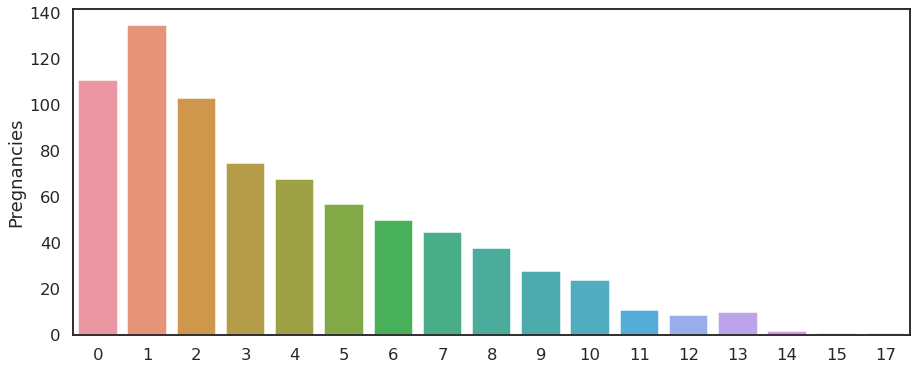

In [4]:
def barplot(data):
    plt.figure(figsize=(15,6))
    return sns.barplot(x=data.index,y=data)

barplot(data['Pregnancies'].value_counts())

* if pregnance, may have diabetes.

In [5]:
temp={}
temp['preg & diab']=data[(data['Pregnancies']>0)&(data['Outcome']==1)].shape[0]/len(data)
temp['preg & no_diab']=data[(data['Pregnancies']>0)&(data['Outcome']==0)].shape[0]/len(data)
temp['no_preg & diab']=data[(data['Pregnancies']==0)&(data['Outcome']==1)].shape[0]/len(data)
temp['no_preg % no_diab']=data[(data['Pregnancies']==0)&(data['Outcome']==0)].shape[0]/len(data)

temp

{'preg & diab': 0.2994791666666667,
 'preg & no_diab': 0.5559895833333334,
 'no_preg & diab': 0.049479166666666664,
 'no_preg % no_diab': 0.09505208333333333}

* if pregnancies, may affect diabetes little.

In [6]:
data[data['Pregnancies']>0]['Outcome'].value_counts(normalize=True)

0   0.6
1   0.4
Name: Outcome, dtype: float64

In [7]:
data[data['Pregnancies']==0]['Outcome'].value_counts(normalize=True)

0   0.7
1   0.3
Name: Outcome, dtype: float64

> # Glucose

In [8]:
data[data['Glucose']>0]['Outcome'].value_counts(normalize=True)

0   0.7
1   0.3
Name: Outcome, dtype: float64

* Glucose may not affect Outcome

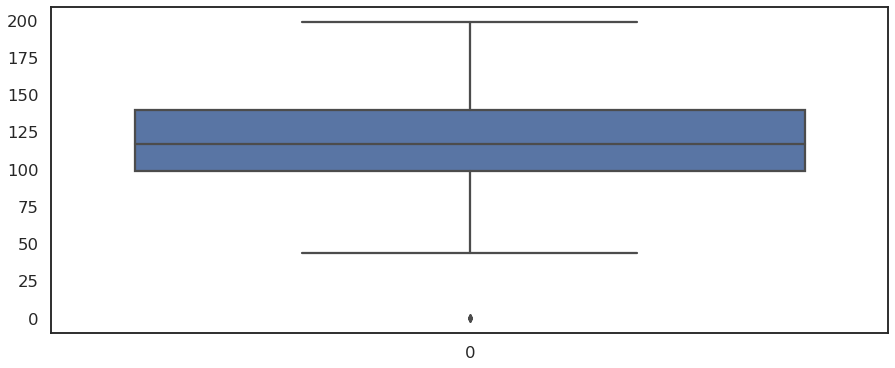

In [9]:
def boxplot(data,x):
    plt.figure(figsize=(15,6))
    return sns.boxplot(data=data[x])

boxplot(data,'Glucose')

<cite>If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.</cite>  
<small>google</small>

In [10]:
data[data['Glucose']>125]['Outcome'].value_counts(normalize=True)

1   0.6
0   0.4
Name: Outcome, dtype: float64

In [11]:
data[data['Glucose']<=125]['Outcome'].value_counts(normalize=True)

0   0.8
1   0.2
Name: Outcome, dtype: float64

* two group differ each other.
* if Glucose > 125, may have diabetes

In [12]:
data['rank_glucose']=pd.cut(data['Glucose'],bins=[-1,125,200],labels=['fine','danger'])

* split two groups

# BloodPressure

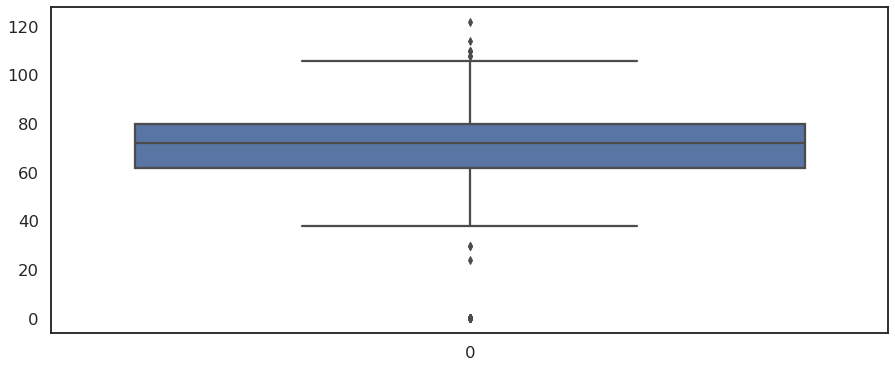

In [13]:
boxplot(data,'BloodPressure')

* not really bloodpressure 0

In [14]:
(data[data['BloodPressure']>75]['Outcome'].value_counts(normalize=True),
data[data['BloodPressure']>80]['Outcome'].value_counts(normalize=True),
data[data['BloodPressure']>100]['Outcome'].value_counts(normalize=True))

(0   0.6
 1   0.4
 Name: Outcome, dtype: float64,
 0   0.5
 1   0.5
 Name: Outcome, dtype: float64,
 1   0.6
 0   0.4
 Name: Outcome, dtype: float64)

### bigger BloodPressure value, higher probability
<cite>image citation google</cite>

![image](https://d3lyw5txtfb7yt.cloudfront.net/wp-content/uploads/2018/02/blood-pressure-readings.png)

* replace 0 to value

In [15]:
data.loc[(data['Outcome'] == 0)  & (data['BloodPressure']==0),'BloodPressure']=70
data.loc[(data['Outcome'] == 1)  & (data['BloodPressure']==0),'BloodPressure']=120

# SkinThickness

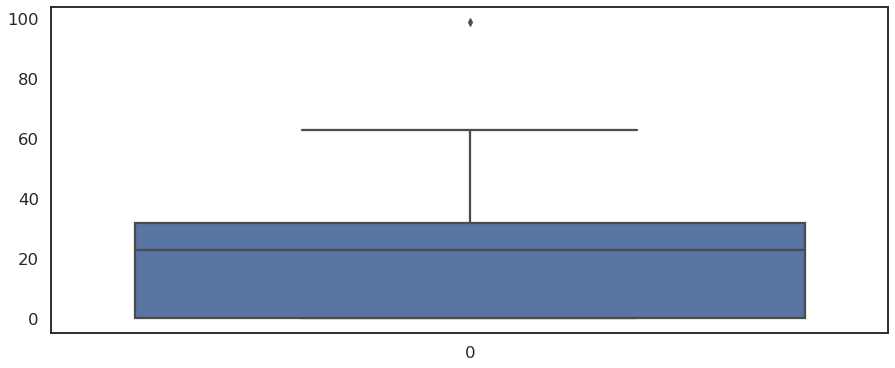

In [16]:
boxplot(data,'SkinThickness')

* more thickness, more danger

In [17]:
(data[data['SkinThickness']>20]['Outcome'].value_counts(normalize=True),
 data[data['SkinThickness']>40]['Outcome'].value_counts(normalize=True),
 data[data['SkinThickness']>60]['Outcome'].value_counts(normalize=True))

(0   0.6
 1   0.4
 Name: Outcome, dtype: float64,
 1   0.5
 0   0.5
 Name: Outcome, dtype: float64,
 1   1.0
 Name: Outcome, dtype: float64)

* split three groups

In [18]:
data['rank_SkinThickness']=pd.cut(data['SkinThickness'],bins=[-1,25,40,60],labels=['good','fine','danger'])

# Insulin

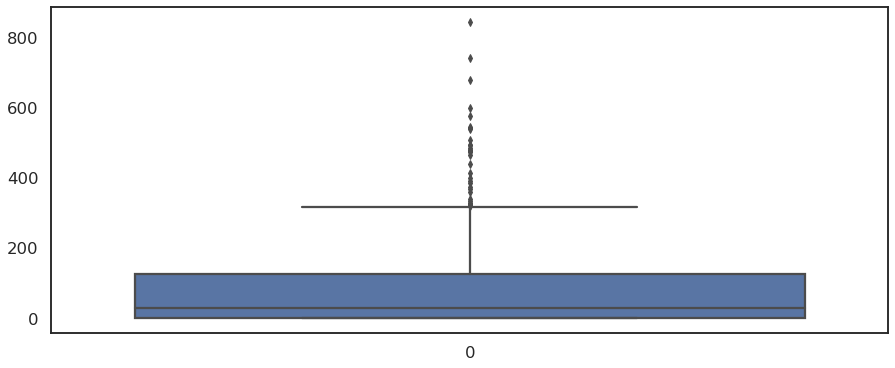

In [19]:
boxplot(data,'Insulin')

In [20]:
(data[data['Insulin']>0]['Outcome'].value_counts(normalize=True),
 data[data['Insulin']>200]['Outcome'].value_counts(normalize=True),
 data[data['Insulin']>300]['Outcome'].value_counts(normalize=True))

(0   0.7
 1   0.3
 Name: Outcome, dtype: float64,
 1   0.5
 0   0.5
 Name: Outcome, dtype: float64,
 1   0.6
 0   0.4
 Name: Outcome, dtype: float64)

* split groups

In [21]:
data['rank_Insulin']=pd.cut(data['Insulin'],bins=[-1,300,850],
                           labels=['fine','danger'])

# BMI

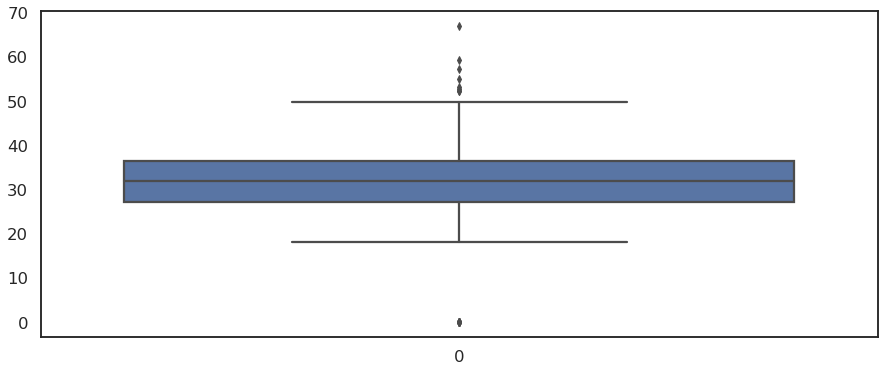

In [22]:
boxplot(data,'BMI')

In [23]:
(data[data['BMI']>20]['Outcome'].value_counts(normalize=True),
 data[data['BMI']>40]['Outcome'].value_counts(normalize=True),
 data[data['BMI']>60]['Outcome'].value_counts(normalize=True))

(0   0.6
 1   0.4
 Name: Outcome, dtype: float64,
 1   0.6
 0   0.4
 Name: Outcome, dtype: float64,
 1   1.0
 Name: Outcome, dtype: float64)

* split groups

In [24]:
data['rank_BMI']=pd.cut(data['BMI'],bins=[-1,30,100],labels=['fine','danger'])

# DiabetesPedigreeFunction	

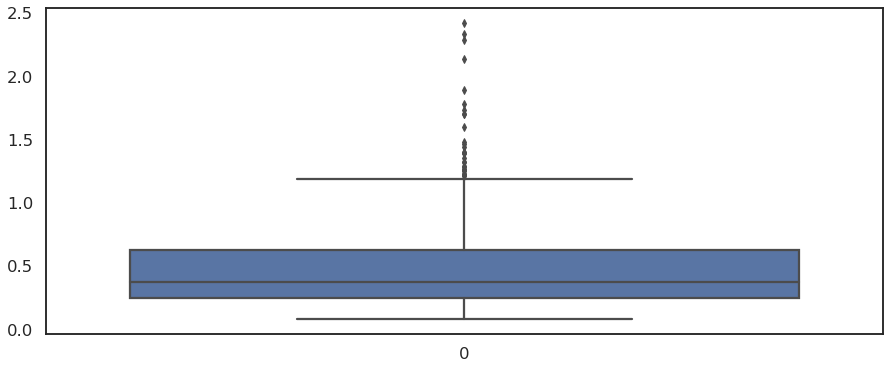

In [25]:
boxplot(data,'DiabetesPedigreeFunction')

In [26]:
(data[data['DiabetesPedigreeFunction']>0.5]['Outcome'].value_counts(normalize=True),
 data[data['DiabetesPedigreeFunction']>0.8]['Outcome'].value_counts(normalize=True),
 data[data['DiabetesPedigreeFunction']>1.3]['Outcome'].value_counts(normalize=True),
 data[data['DiabetesPedigreeFunction']>1.6]['Outcome'].value_counts(normalize=True),
 data[data['DiabetesPedigreeFunction']>1.8]['Outcome'].value_counts(normalize=True))

(0   0.5
 1   0.5
 Name: Outcome, dtype: float64,
 1   0.5
 0   0.5
 Name: Outcome, dtype: float64,
 1   0.5
 0   0.5
 Name: Outcome, dtype: float64,
 0   0.6
 1   0.4
 Name: Outcome, dtype: float64,
 1   0.8
 0   0.2
 Name: Outcome, dtype: float64)

* don't care value
* usually 0.4.

In [27]:
data['rank_DiabetesPedigreeFunction']=pd.cut(data['DiabetesPedigreeFunction'],bins=[-1,1.8,2.5],labels=['fine','danger'])

# Age

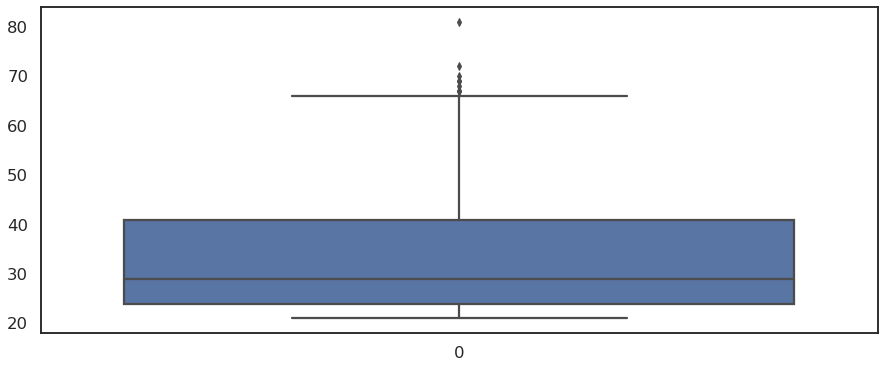

In [28]:
boxplot(data,'Age')

In [29]:
(data[data['Age']>29]['Outcome'].value_counts(normalize=True),
 data[data['Age']>40]['Outcome'].value_counts(normalize=True),
 data[data['Age']>70]['Outcome'].value_counts(normalize=True))

(0   0.5
 1   0.5
 Name: Outcome, dtype: float64,
 1   0.5
 0   0.5
 Name: Outcome, dtype: float64,
 0   1.0
 Name: Outcome, dtype: float64)

* i think no age-relation.

# Summary

* first label feature convert to numeric feature

In [32]:
import sklearn.preprocessing

In [33]:
def labelencoder(data:pd.DataFrame):
    encoder=sklearn.preprocessing.LabelEncoder()
    cols=['rank_glucose','rank_SkinThickness','rank_Insulin','rank_BMI','rank_DiabetesPedigreeFunction']
    for col in cols:
        data[col]=encoder.fit_transform(data[col].values.tolist())
    return data

data=labelencoder(data)

* heatmap

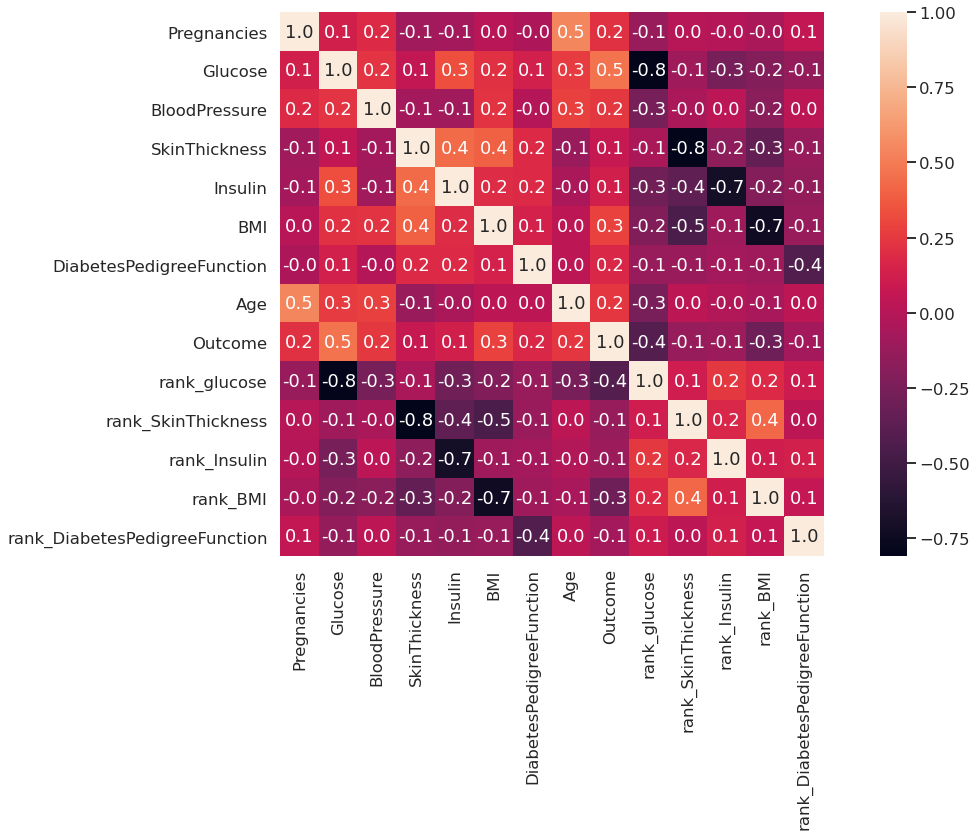

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,square=True,fmt='.1f')

* most of features do not relate outcome.

# lightgbm

In [41]:
import lightgbm as lgb
import bayes_opt

In [38]:
X_train=data.drop('Outcome',axis=1)
y_train=data['Outcome']

* param_tuning

In [99]:
def lgb_val(learning_rate,num_leaves,max_depth,lambda_l1,lambda_l2,min_data_in_leaf,bagging_fraction):
    params={
        'max_bin':15,
        'metric':'auc',
        'objective':'binary',
        'save_binary':True,
        'is_unbalance':True,
        'learning_rate':learning_rate,
        'num_leaves':int(num_leaves),
        'max_depth':int(max_depth),
        'lambda_l1':lambda_l1,
        'lambda_l2':lambda_l2,
        'min_data_in_leaf':int(min_data_in_leaf),
        'bagging_fraction':bagging_fraction,
        'bagging_freq':5,
        'verbosity':-1
    }
    lgb_val=lgb.Dataset(X_train,label=y_train)
    cv=lgb.cv(params,lgb_val,num_boost_round=1000,early_stopping_rounds=100,nfold=5,verbose_eval=200)
     
    return cv['auc-mean'][-1]

def param_tuning(init_points,n_iter):
    lgbBO=bayes_opt.BayesianOptimization(lgb_val,{
        'learning_rate':(0.003,0.005),
        'num_leaves':(31,63),
        'max_depth':(5,10),
        'lambda_l1':(0.001,0.1),
        'lambda_l2':(0.001,0.1),
        'min_data_in_leaf':(20,40),
        'bagging_fraction':(0.5,0.8)
    },random_state=0)
    
    lgbBO.maximize(init_points=init_points,n_iter=n_iter,acq='ei')
    return lgbBO

In [102]:
result=param_tuning(5,10)

|   iter    |  target   | baggin... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------
[200]	cv_agg's auc: 0.825548 + 0.0425836
|  1        |  0.8279   |  0.6646   |  0.0718   |  0.06067  |  0.00409  |  7.118    |  32.92    |  45.0     |
[200]	cv_agg's auc: 0.825019 + 0.0445726
|  2        |  0.8261   |  0.7675   |  0.0964   |  0.03896  |  0.004583 |  7.644    |  31.36    |  60.62    |
|  3        |  0.8275   |  0.5213   |  0.009626 |  0.003002 |  0.004665 |  8.891    |  37.4     |  62.32    |
[200]	cv_agg's auc: 0.82463 + 0.0422822
|  4        |  0.8257   |  0.7397   |  0.04669  |  0.07827  |  0.003237 |  8.2      |  22.87    |  61.23    |
[200]	cv_agg's auc: 0.825964 + 0.0422956
|  5        |  0.8284   |  0.6566   |  0.04205  |  0.02719  |  0.004548 |  7.281    |  31.37    |  31.6     |
[200]	cv_agg's auc: 0.825076 + 0.0437476
|  6        |  0.8263   | 

* find best_param

In [103]:
def best_param(result):
    best=0.8
    iter_=0
    for i,res in enumerate(result.res):
        if best<res['target']:
            best=res['target']
            iter_=i
    return result.res[iter_]['params']

param_=best_param(result)

In [104]:
param_

{'bagging_fraction': 0.5508242096580529,
 'lambda_l1': 0.023257739749605513,
 'lambda_l2': 0.08465304370756026,
 'learning_rate': 0.004872512075447705,
 'max_depth': 9.225416707316873,
 'min_data_in_leaf': 34.806848116349414,
 'num_leaves': 51.90818929594225}

* just put train data

In [117]:
def lgb_train(X_train,y_train,n):
    params={'bagging_fraction': 0.5508242096580529,
             'lambda_l1': 0.023257739749605513,
             'lambda_l2': 0.08465304370756026,
             'learning_rate': 0.004872512075447705,
             'max_depth': int(9.225416707316873),
             'min_data_in_leaf': int(34.806848116349414),
             'num_leaves': int(51.90818929594225),
             'max_bin':15,
             'metric':'auc',
             'objective':'binary',
             'save_binary':True,
             'is_unbalance':True,
             'bagging_freq':5,
             'verbosity':-1
           }
    
    folds=sklearn.model_selection.KFold(shuffle=True,random_state=0,n_splits=n)
    preds=[]
    
    for train_idx,valid_idx in folds.split(X_train):
        X_tr,X_val=X_train.iloc[train_idx,:],X_train.iloc[valid_idx,:]
        y_tr,y_val=y_train[train_idx],y_train[valid_idx]
    
        lgb_train=lgb.Dataset(X_tr,label=y_tr)
        lgb_val=lgb.Dataset(X_val,label=y_val)
        
        model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=[lgb_val],verbose_eval=200)
        
        pred=model.predict(X_train)
        preds.append(pred)
        
    avg_pred=sum(preds)/len(preds)
    return avg_pred

avg_pred=lgb_train(X_train,y_train,5)

[200]	valid_0's auc: 0.866773
[400]	valid_0's auc: 0.868363
[600]	valid_0's auc: 0.865381
[800]	valid_0's auc: 0.866972
[1000]	valid_0's auc: 0.861802
[200]	valid_0's auc: 0.826075
[400]	valid_0's auc: 0.829446
[600]	valid_0's auc: 0.8207
[800]	valid_0's auc: 0.810678
[1000]	valid_0's auc: 0.809402
[200]	valid_0's auc: 0.832649
[400]	valid_0's auc: 0.825156
[600]	valid_0's auc: 0.817663
[800]	valid_0's auc: 0.814808
[1000]	valid_0's auc: 0.809099
[200]	valid_0's auc: 0.841923
[400]	valid_0's auc: 0.837354
[600]	valid_0's auc: 0.834978
[800]	valid_0's auc: 0.829861
[1000]	valid_0's auc: 0.824744
[200]	valid_0's auc: 0.784046
[400]	valid_0's auc: 0.796115
[600]	valid_0's auc: 0.80102
[800]	valid_0's auc: 0.800235
[1000]	valid_0's auc: 0.803964


In [118]:
avg_pred=list(map(lambda x:1 if x>0.5 else 0,avg_pred))

* mae with y_train ,model_pred
* this model has 81% accuracy

In [119]:
def mae(pred,true):
    diff=abs(pred-true)
    return sum(diff)/len(pred)

mae(avg_pred,y_train)

0.18880208333333334